# Setup Notebook

In [2]:
# Standard library
import os
import sys
sys.path.append("../src/")

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

In [14]:
# Find the notebook the saved figures came from
fig_prefix = "../figures/2017-01-14-tc-"

## Load Data

In [36]:
!head -n2 ../data/P00000001-ALL.csv


cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,"P60006723","Rubio, Marco","BLUM, MAUREEN","WASHINGTON","20","DC","STRATEGIC COALITIONS & INITIATIVES LL","OUTREACH DIRECTOR",175,15-MAR-16,"","","","SA17A","1082559","SA17.1152124","P2016",


In [40]:
cols = ['cand_nm', 'contbr_st', 'contbr_employer', \
        'contb_receipt_amt', 'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt']
donate = pd.read_csv('../data/P00000001-ALL.csv', index_col=False, dtype='object', usecols = cols)
donate['contb_receipt_amt'] = pd.to_numeric(donate['contb_receipt_amt'])
# donate['contb_receipt_dt'] = pd.to_datetime(donate['contb_receipt_dt'])

donate.dtypes

cand_nm               object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
dtype: object

## Review Data

In [43]:
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

In [46]:
donate.head()

,cand_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Rubio, Marco",20,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16
1,"Rubio, Marco",30,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16
2,"Rubio, Marco",AE,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16
3,"Rubio, Marco",AE,DODEA/DS,TEACHER,500.0,26-JUN-15
4,"Rubio, Marco",AE,US ARMY,PHYSICIAN,200.0,10-MAR-16


In [45]:
qgrid.show_grid(donate.head(), remote_js=True)

In [58]:
donate.groupby('cand_nm').mean()

,contb_receipt_amt
cand_nm,
"Bush, Jeb",1070.511192
"Carson, Benjamin S.",106.105080
"Christie, Christopher J.",1310.567022
"Clinton, Hillary Rodham",147.170917
"Cruz, Rafael Edward 'Ted'",101.012978
"Fiorina, Carly",229.541594
"Gilmore, James S III",1164.883068
"Graham, Lindsey O.",834.992954
"Huckabee, Mike",364.101526


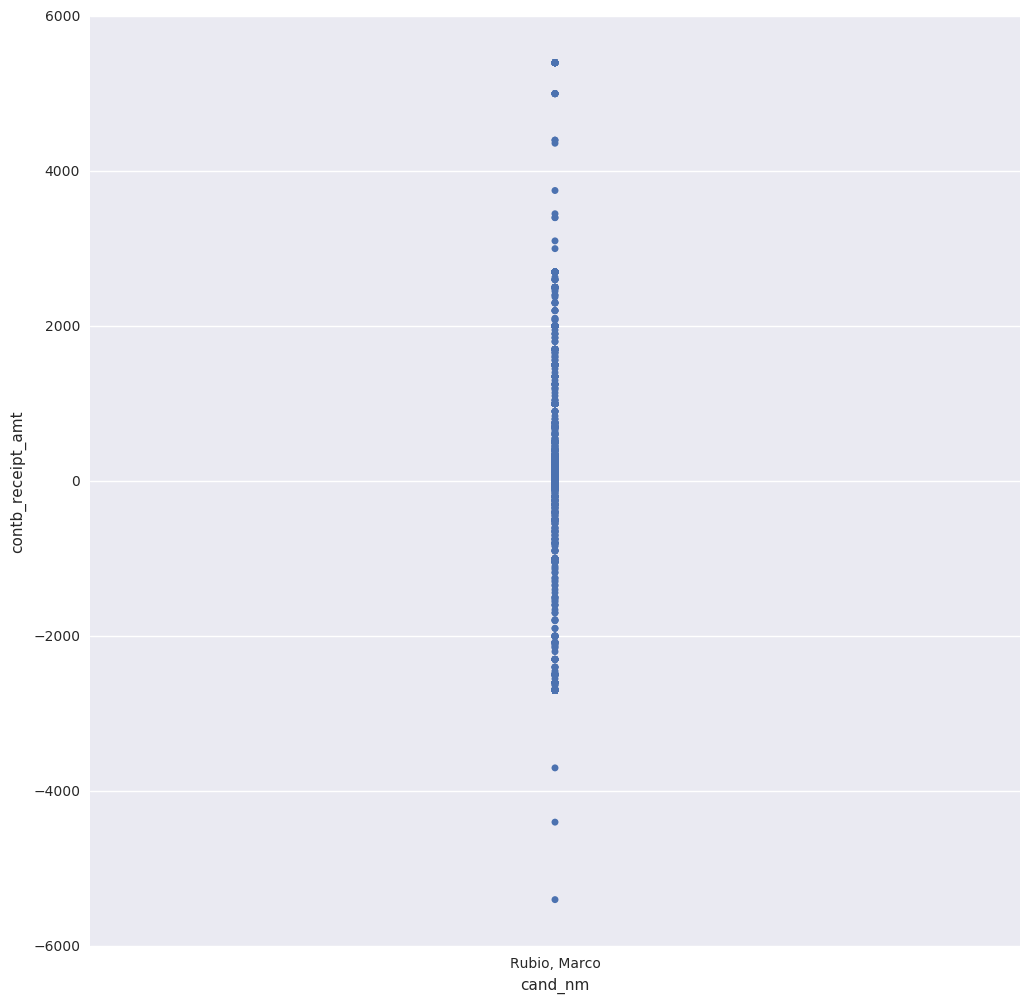

In [56]:
sns.stripplot(x="cand_nm", y="contb_receipt_amt", data=donate[10000:20000]);

In [ ]:
#x = np.random.normal(size=100)
sns.distplot(donate['contb_receipt_amt'], bins=20, kde=False, rug=True);